# V213. Kreisel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

### 3.2 Dämpfung des Kreisels

In [4]:
#Input der Daten Drehfrequenz am gedämpften Kreisel

t = np.array([0, 120, 240, 360, 480, 600, 720]) #Messzeit t[s]
ω = 2*np.pi/60*np.array([680.3, 625.3, 573.7, 531.9, 488.5, 451.3, 418.1]) #Kreisfrequenz ω[1/min]

err_t = 5.0 #Fehler durch nicht instantan mögliches Ablesen der Messanzeige [s]
err_ω = 1.0 #Fehler der Kreisfrequenz durch Schwankung der Messanzeige [1/min]

Halbwertszeit: T1/2 = (1020 ± 8)s


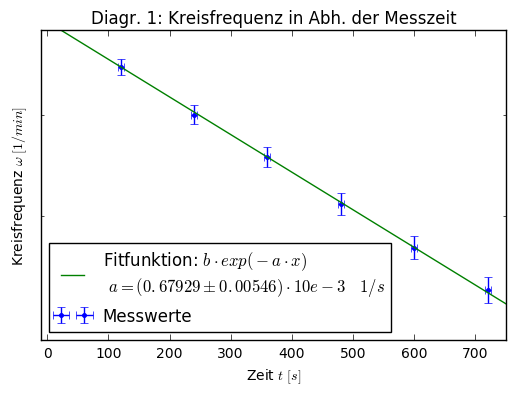

In [14]:
#Fit 

def exp(x, A, B):
    return B*np.exp(-A*x)

popt, pcov = curve_fit(exp, t, ω, sigma = err_ω, p0 = [0.01,700])
a = popt[0]
err_a = np.sqrt(pcov[0,0])
ts = np.linspace(-10,750,7600)

#Plot

plt.errorbar(t, ω, xerr = err_t, yerr = err_ω, fmt = '.', label = 'Messwerte')
plt.plot(ts, exp(ts, *popt), label = 'Fitfunktion: $b \cdot exp(-a \cdot x)$ \n $a = ({:.5f}\pm {:.5f}) \cdot 10e-3 \quad 1/s$' .format(a*10**3, err_a*10**3))

plt.title('Diagr. 1: Kreisfrequenz in Abh. der Messzeit')
plt.xlabel('Zeit $t\ [s]$')
plt.ylabel('Kreisfrequenz $\omega\ [1/min]$')
plt.yscale('log')
plt.xlim(-10, 750)
plt.ylim(4e1, 7e1)
plt.legend(loc = 'best')

#Berechnung der Halbwertszeit

T = np.log(2)/a
err_T = T*err_a/a
print('Halbwertszeit: T1/2 = ({:.0f} ± {:.0f})s'.format(T, err_T))
plt.savefig('V213_Diagr.1', format = 'jpeg')

### 3.3 (b) Präzession

In [18]:
#Input der Messdaten Präzession bei verschiedenen Gewichten

ωi_a = 2*np.pi/60*np.array([612.7, 537.6, 454.2, 390.2]) #Frequenz f_a [1/min] für ein Gewicht bei 15cm
Tp_a = np.array([94.07, 82.23, 73.36, 62.75]) #Präzessionsdauer Tp [s]

ωi_b = 2*np.pi/60*np.array([697.1, 596.0, 510.1, 388.3])#Frequenz f_b [1/min] für ein Gewicht bei 20cm 
Tp_b = np.array([87.23, 74.73, 64.58, 49.80]) #Präzessionsdauer Tp [s]

ωi_c = 2*np.pi/60*np.array([688.3, 448.3, 367.7, 311.3]) #Frequenz f_c [1/min] für zwei Gewichte bei 15cm
Tp_c = np.array([59.98, 39.59, 32.61, 27.76]) #Präzessionsdauer Tp [s]

ωi_d = 2*np.pi/60*np.array([622.6, 542.3, 389.4, 297.1]) #Frequenz f_a [1/min] für zwei Gewichte bei 20cm
Tp_d = np.array([42.54, 36.73, 26.48, 20.23]) #Präzessionsdauer Tp [s]

err_T = 2 #Fehler ΔTp [s] der Präzessionsdauer 
m = 9.85e-3 #Masse m [g] des Gewichts
err_m = 0.05e-3 #[g]
l1 = 15e-2 #Anbringstelle l1 [m] des Gewichts
l2 = 20e-2 #Anbringstelle l2[m] des Gewichts
err_l = 0.5e-2 #Fehler Δl[m]der Anbringstelle


#Berücksichtigung der Dämpfung

#Drehfrequenzen am Ende der Präzessionsbewegung
ωfinal_a = ωi_a*np.exp(-a*Tp_a/2) 
ωfinal_b = ωi_b*np.exp(-a*Tp_b/2)
ωfinal_c = ωi_c*np.exp(-a*Tp_c/2)
ωfinal_d = ωi_d*np.exp(-a*Tp_d/2)

err_ωfinal_a = err_ω*np.exp(-a*Tp_a/2) 
err_ωfinal_b = err_ω*np.exp(-a*Tp_b/2)
err_ωfinal_c = err_ω*np.exp(-a*Tp_c/2)
err_ωfinal_d = err_ω*np.exp(-a*Tp_d/2)

#Mittlere Drehfrequenz
ω_a = 0.5*(ωi_a + ωfinal_a)
ω_b = 0.5*(ωi_b + ωfinal_b)
ω_c = 0.5*(ωi_c + ωfinal_c)
ω_d = 0.5*(ωi_d + ωfinal_d)

err_ω_a = 0.5*np.sqrt(err_ω**2 + err_ωfinal_a**2)
err_ω_b = 0.5*np.sqrt(err_ω**2 + err_ωfinal_b**2)
err_ω_c = 0.5*np.sqrt(err_ω**2 + err_ωfinal_c**2)
err_ω_d = 0.5*np.sqrt(err_ω**2 + err_ωfinal_d**2)

Trägheitsmoment: I_za = (0.00349 ± 0.00013)kg*cm²


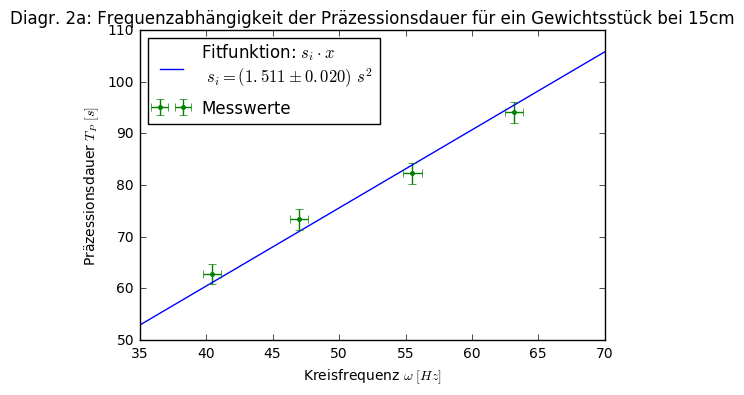

In [25]:
#Fitfunktion

def linear(x, a):
    return a*x 

x = np.linspace(35,70)

popt_a, pcov_a = curve_fit(linear, ω_a, Tp_a, sigma = err_T)

plt.plot(x, linear(x, *popt_a), label = 'Fitfunktion: $s_i \cdot x$ \n $s_i = ({:.3f} \pm {:.3f})\ s^2$'.format(popt_a[0], np.sqrt(pcov_a[0,0])))
plt.errorbar(ω_a, Tp_a, xerr = err_ω_a, yerr = err_T, fmt = '.', label = 'Messwerte')
plt.title('Diagr. 2a: Frequenzabhängigkeit der Präzessionsdauer für ein Gewichtsstück bei 15cm')
plt.xlabel('Kreisfrequenz $\omega\ [Hz]$')
plt.ylabel('Präzessionsdauer $T_P\ [s]$')
plt.legend(loc = 'best')

I_za = m*9.81*l1*popt_a[0]/(2*np.pi)
err_Iza = I_za*np.sqrt((err_l/l1)**2 + (err_m/m)**2 + (np.sqrt(pcov_a[0,0])/popt_a[0])**2)


print('Trägheitsmoment: I_za = ({:.5f} ± {:.5f})kg*cm²'.format(I_za, err_Iza))
plt.savefig('V213_Diagr.2a', format = 'jpeg')

Trägheitsmoment: I_z = (0.00374 ± 0.00010)kg*cm²


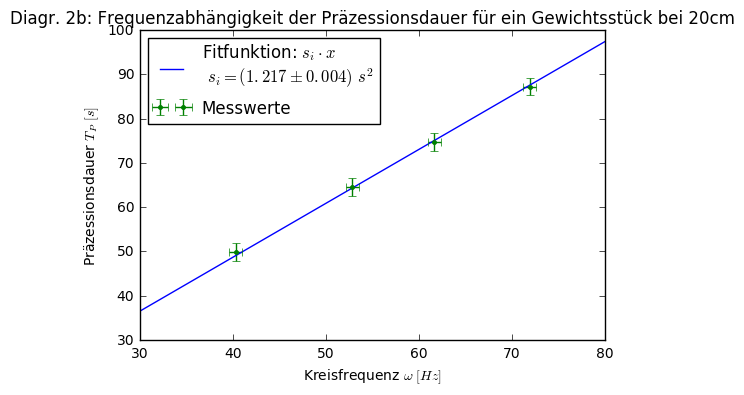

In [27]:
popt_b, pcov_b = curve_fit(linear, ω_b, Tp_b, sigma = err_T)

x = np.linspace(30,80)
plt.plot(x, linear(x, *popt_b), label = 'Fitfunktion: $s_i \cdot x$ \n $s_i = ({:.3f} \pm {:.3f})\ s^2$'.format(popt_b[0], np.sqrt(pcov_b[0,0])))
plt.errorbar(ω_b, Tp_b, xerr = err_ω_b, yerr = err_T, fmt = '.', label = 'Messwerte')
plt.title('Diagr. 2b: Frequenzabhängigkeit der Präzessionsdauer für ein Gewichtsstück bei 20cm')
plt.xlabel('Kreisfrequenz $\omega\ [Hz]$')
plt.ylabel('Präzessionsdauer $T_P\ [s]$')
plt.legend(loc = 'best')

I_zb = m*9.81*l2*popt_b[0]/(2*np.pi)
err_Izb = I_zb*np.sqrt((err_l/l2)**2 + 2*(err_m/m)**2 + (np.sqrt(pcov_b[0,0])/popt_b[0])**2)


print('Trägheitsmoment: I_z = ({:.5f} ± {:.5f})kg*cm²'.format(I_zb, err_Izb))
plt.savefig('V213_Diagr.2b', format = 'jpeg')

Trägheitsmoment: I_z = (0.00390 ± 0.00013)kg*cm²


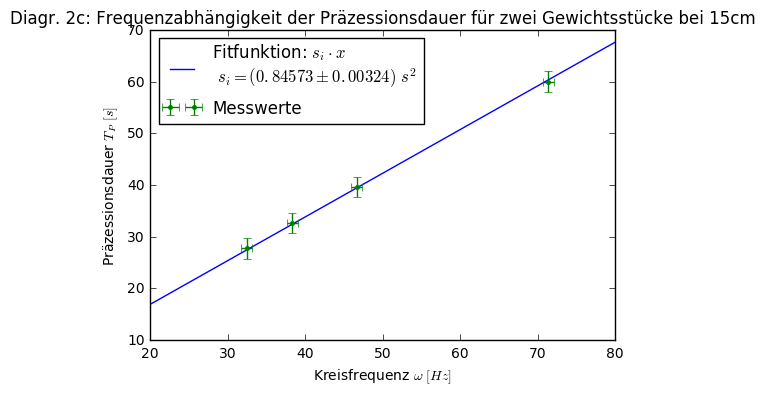

In [28]:
popt_c, pcov_c = curve_fit(linear, ω_c, Tp_c, sigma = err_T)
x = np.linspace(20,80)

plt.plot(x, linear(x, *popt_c), label = 'Fitfunktion: $s_i \cdot x$ \n $s_i = ({:.5f} \pm {:.5f})\ s^2$'.format(popt_c[0], np.sqrt(pcov_c[0,0])))
plt.errorbar(ω_c, Tp_c, xerr = err_ω_c, yerr = err_T, fmt = '.', label = 'Messwerte')
plt.title('Diagr. 2c: Frequenzabhängigkeit der Präzessionsdauer für zwei Gewichtsstücke bei 15cm')
plt.xlabel('Kreisfrequenz $\omega\ [Hz]$')
plt.ylabel('Präzessionsdauer $T_P\ [s]$')
plt.legend(loc = 'best')

I_zc = 2*m*9.81*l1*popt_c[0]/(2*np.pi)
err_Izc = I_zc*np.sqrt((err_l/l1)**2 + (err_m/m)**2 + (np.sqrt(pcov_c[0,0])/popt_c[0])**2)

print('Trägheitsmoment: I_z = ({:.5f} ± {:.5f})kg*cm²'.format(I_zc, err_Izc))
plt.savefig('V213_Diagr.2c', format = 'jpeg')

Trägheitsmoment: I_z = (0.00402 ± 0.00010)kg*cm²


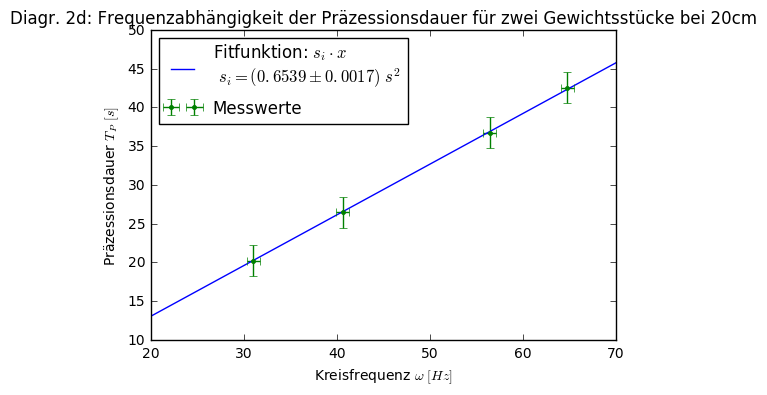

In [30]:
popt_d, pcov_d = curve_fit(linear, ω_d, Tp_d, sigma = err_T)
x = np.linspace(20,70)

plt.plot(x, linear(x, *popt_d), label = 'Fitfunktion: $s_i \cdot x$ \n $s_i = ({:.4f} \pm {:.4f})\ s^2$'.format(popt_d[0], np.sqrt(pcov_d[0,0])))
plt.errorbar(ω_d, Tp_d, xerr = err_ω_d, yerr = err_T, fmt = '.', label = 'Messwerte')
plt.title('Diagr. 2d: Frequenzabhängigkeit der Präzessionsdauer für zwei Gewichtsstücke bei 20cm')
plt.xlabel('Kreisfrequenz $\omega\ [Hz]$')
plt.ylabel('Präzessionsdauer $T_P\ [s]$')
plt.legend(loc = 'best')

I_zd = 2*m*9.81*l2*popt_d[0]/(2*np.pi)
err_Izd = I_zd*np.sqrt((err_l/l2)**2 + (err_m/m)**2 + (np.sqrt(pcov_d[0,0])/popt_d[0])**2)


print('Trägheitsmoment: I_z = ({:.5f} ± {:.5f})kg*cm²'.format(I_zd, err_Izd))
plt.savefig('V213_Diagr.2d', format = 'jpeg')

### 3.4 (b) Umlauf der momentanen Drehachse um die Figurenachse

In [31]:
#Input der Messdaten Umlauf Dreh- um Figurenachse

ω = (2*np.pi/60)*np.array([584.5, 553.5, 525.2, 497.9, 468.3, 442.0, 418.3, 397.3, 365.1, 337.1]) #Frequenz [1/s]
t = np.array([16.46, 17.12, 18.06, 19.39, 20.46, 21.78, 22.84, 25.07, 27.10, 29.56]) #Umlaufdauer [s]
err_ω = (2*np.pi/60)*err_ω #Fehler der Frequenz [1/s]
err_t = 0.3 #Fehler der Umlaufdauer [s]

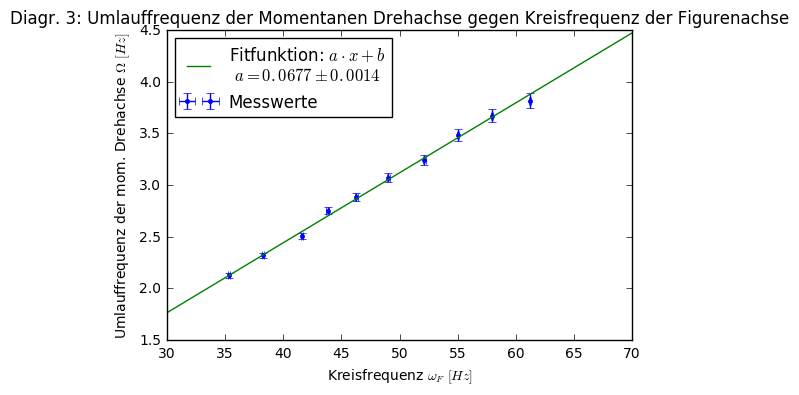

In [33]:
#Bestimmung der Umlauffrequenz

Ω = 20*np.pi/t
err_Ω = Ω*(err_t/t)

#Fitfunktion

def linear(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear, ω, Ω, sigma = err_Ω)
a = popt[0]
err_a = np.sqrt(pcov[0,0])
x = np.linspace(30,70)


#Plot

plt.errorbar(ω,Ω, xerr = err_ω, yerr = err_Ω, fmt = '.', label = 'Messwerte')
plt.plot(x, linear(x, *popt), label = 'Fitfunktion: $a \cdot x+b$ \n $a = {:.4f} \pm {:.4f}$' .format(a, err_a))
plt.title('Diagr. 3: Umlauffrequenz der Momentanen Drehachse gegen Kreisfrequenz der Figurenachse')
plt.xlabel('Kreisfrequenz $\omega_F\ [Hz]$')
plt.ylabel('Umlauffrequenz der mom. Drehachse $\Omega\ [Hz]$')
plt.legend(loc = 'upper left')

plt.savefig('V213_Diagr.3', format = 'jpeg')

In [34]:
#Bestimmung des Trägheitsmoments I_x

I_z = (I_za + I_zb + I_zc + I_zd)/4
err_Iz = np.sqrt(err_Iza**2 + err_Izb**2 + err_Izc**2 + err_Izd**2)/4
I_x = (I_z/((1/a)) + I_z)
err_Ix = np.sqrt(((1/((1/a)-1)+1)*err_Iz)**2 + (I_z*err_a/((((1/a)-1)*a)**2))**2)

print('I_x = ({:.5f} +/- {:.5f}) kg*m²'.format(I_x, err_Ix))

I_x = (0.00405 +/- 0.00006) kg*m²


### 3.5 Nutation

In [35]:
#Input der Messdaten aus Tabelle zu Nutation

ω_N = (2*np.pi/60)*np.array([620, 570, 510, 480, 450, 440, 310, 290, 830, 730])
ω_F = (2*np.pi/60)*np.array([660, 610, 550, 520, 490, 470, 340, 320, 880, 780])

err_ωN = (2*np.pi/60)*5
err_ωF = (2*np.pi/60)*5 

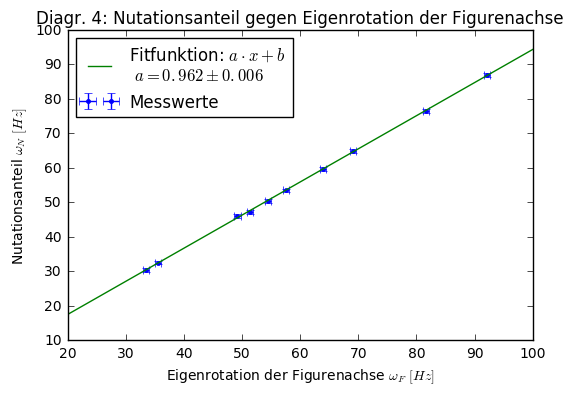

In [37]:
#Fitfunktion

popt, pcov = curve_fit(linear, ω_F, ω_N, sigma = err_ωN)
a = popt[0]
err_a = np.sqrt(pcov[0,0])
x = np.linspace(20, 100)

#Plot

plt.errorbar(ω_F,ω_N, xerr = err_ωF, yerr = err_ωN, fmt = '.', label = 'Messwerte')
plt.plot(x, linear(x, *popt), label = 'Fitfunktion: $a \cdot x+b$ \n $a = {:.3f} \pm {:.3f}$' .format(a, err_a))
plt.title('Diagr. 4: Nutationsanteil gegen Eigenrotation der Figurenachse')
plt.xlabel('Eigenrotation der Figurenachse $\omega_F\ [Hz]$')
plt.ylabel('Nutationsanteil $\omega_N\ [Hz]$')
plt.legend(loc = 'upper left')

plt.savefig('V213_Diagr.4', format = 'jpeg')

In [38]:
#Bestimmung des Trägheitsmoments I_x

I_x = I_z/a
err_Ix = I_x*np.sqrt((err_Iz/I_z)**2 + (err_a/a)**2)

print('I_x = ({:.5f} +/- {:.5f}) kg*m²'.format(I_x, err_Ix))

I_x = (0.00394 +/- 0.00006) kg*m²
